# Lista 5 - Aprendizagem Automática

**Davi Braga Gomes - 0396905**

K-médias e PCA
    
## 1)  K-médias




- Carregue os dados contidos no arquivo ex5data1.data. O arquivo contém uma matriz de dados.
  Esta matriz é composta de 150 linhas e 5 colunas. As 4 primeiras colunas representam 4 atributos e a coluna 5 representa a classe a qual pertence o exemplo. Nestes dados, existem 3 classes, sendo 50 exemplos de cada classe.
  Os dados pertencem a um problema de reconhecimento flores (íris dataset). Os 4 atributos são tamanho e espessura da sépala e da pétala de cada flor. As três classes referem-se as flores 1-setosa, 2- versicolor e 3-virginica.
- Implemente o k-médias para a base de dados, utilizando somente os 4 primeiros atributos.
- Varie o número de clusters entre 2 e 5
- Calcule o somatório dos erros quadráticos em relação aos centroides para cada número de agrupamentos.
  - **Apresentar**: Gráfico do erro pelo número de agrupamentos
  - **Apresentar**: O número de agrupamentos para este problema, de acordo com a heurística apresentada em aula
  - **Comentários**: Comente sobre o número de classes obtido
  - Execute o K-médias para o número de agrupamentos obtidos
  - Compare o resultado com o valor real das classes
  - **Comentários**: Comente sobre o resultado obtido

### Carregando os dados:

In [1]:
import numpy as np
import pandas as pd

attributes = ['X1', 'X2', 'X3', 'X4', 'Y']
df = pd.read_csv('ex5data1.data', names=attributes);

### Normalizando os dados:

In [2]:
df_inputs = df[attributes[:-1]]
df_inputs_norm = df_inputs.apply(lambda series: (series - series.mean())/series.std(ddof=0))
df_inputs_norm['Y'] = df['Y']

### Plotando a matriz de espalhamento dos dados:

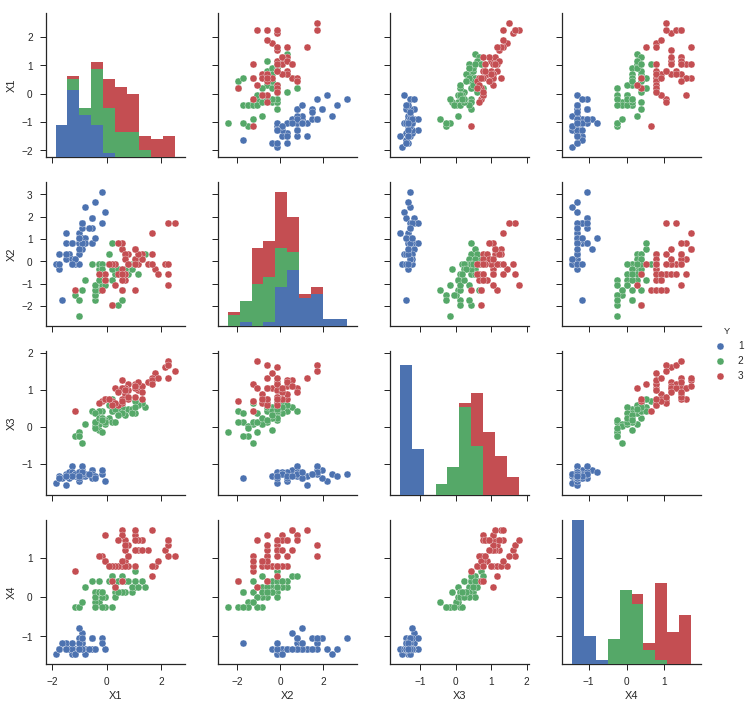

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(df_inputs_norm, hue='Y', vars = attributes[:-1])
plt.show()

### Implementando o k-médias:

In [100]:
class KMeans:
    
    def __init__(self, k):
        self.k = k
        self.means = None            
        
    def classify(self, point):
        return min(range(self.k), key=lambda i: np.linalg.norm(point - self.means[i]))
    
    def train(self, data):
        n_rows = data.shape[0]
        idx = np.random.randint(n_rows, size=self.k)
        self.means = data[idx,:]
        
        assignments = None
        
        while True:
            
            new_assignments = map(self.classify, data)
            
            if assignments == new_assignments:
                return
            
            assignments = new_assignments
            
            d = {i:[] for i in range(self.k)}
            
            for record in data:
                d[self.classify(record)].append(record)
                
            for key, values in d.items():
                self.means[key] = np.asarray(values).mean(axis=0)

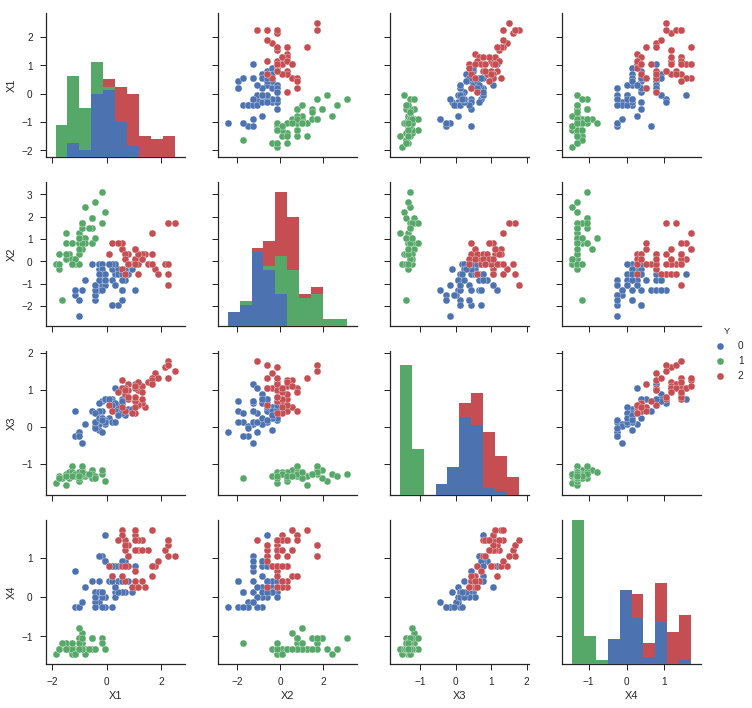

In [101]:
clf = KMeans(3)
clf.train(df_inputs_norm[attributes[:-1]].values)
test = df_inputs_norm[attributes[:-1]]
test['Y'] = pd.Series(map(clf.classify, test.values))

sns.pairplot(test, hue='Y', vars = attributes[:-1])
plt.show()